<a href="https://colab.research.google.com/github/NinaNikolova/data_mining_project/blob/main/python_games6-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving video_game_reviews.csv to video_game_reviews (4).csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import joblib
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('/content/video_game_reviews.csv')
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [54]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df.drop(columns=categorical_cols, inplace=True)
df.head()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
0,36.4,41.41,2015,55.3,1
1,38.3,57.56,2015,34.6,3
2,26.8,44.93,2012,13.9,5
3,38.4,48.29,2015,41.9,4
4,30.1,55.49,2022,13.2,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Calculate mean rating
mean_rating = df["User Rating"].mean()

# Create target classes
target_class = df["User Rating"].apply(lambda x: "High" if x >= mean_rating else "Low")

# Separate features
features = df.drop(columns=["User Rating"])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# Train the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Optional: evaluate accuracy
accuracy = tree.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.93


In [57]:
print(export_text(tree))

|--- feature_0 <= 40.26
|   |--- feature_2 <= 41.65
|   |   |--- feature_2 <= 33.55
|   |   |   |--- feature_0 <= 38.00
|   |   |   |   |--- feature_0 <= 36.74
|   |   |   |   |   |--- feature_0 <= 36.39
|   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |--- feature_0 >  36.39
|   |   |   |   |   |   |--- feature_2 <= 31.90
|   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |   |--- feature_2 >  31.90
|   |   |   |   |   |   |   |--- feature_2 <= 32.25
|   |   |   |   |   |   |   |   |--- class: High
|   |   |   |   |   |   |   |--- feature_2 >  32.25
|   |   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |--- feature_0 >  36.74
|   |   |   |   |   |--- feature_2 <= 32.05
|   |   |   |   |   |   |--- feature_2 <= 30.55
|   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |   |--- feature_2 >  30.55
|   |   |   |   |   |   |   |--- feature_0 <= 37.65
|   |   |   |   |   |   |   |   |--- feature_1 <= 2015.50
|   |   |   |   |   |   |   |   |   |

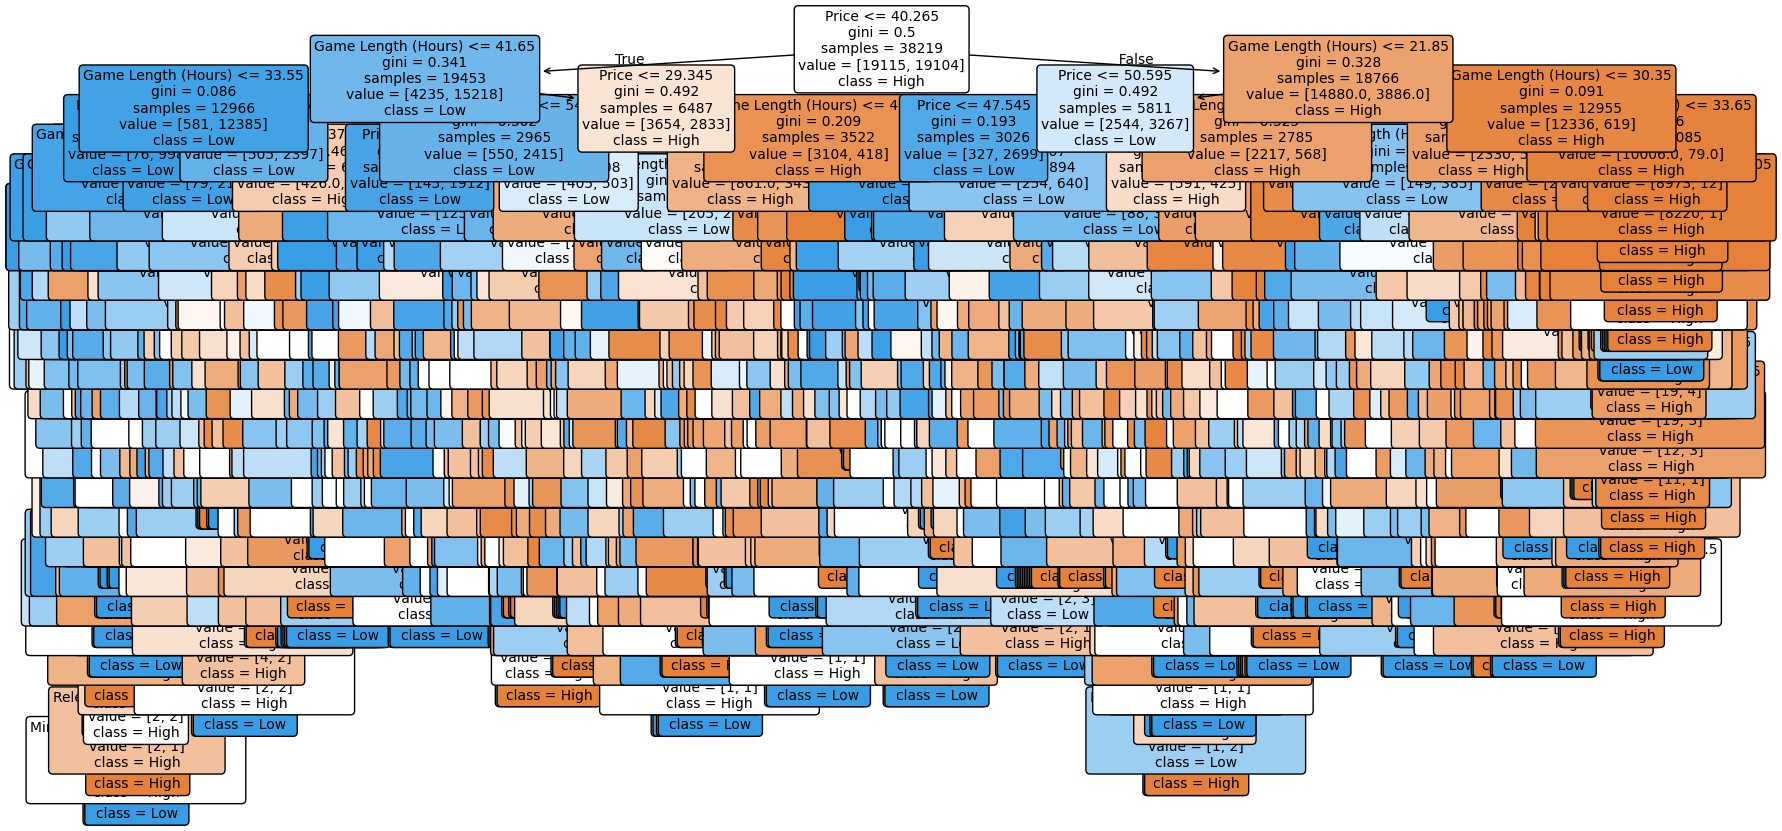

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree)
plot_tree(
    tree,
    feature_names=features.columns,   # Show column names at splits
    class_names=tree.classes_,        # Show "High"/"Low" at leaves
    filled=True,                      # Color the nodes
    rounded=True,                     # Rounded boxes
    fontsize=10                       # Adjust for readability
)


plt.show()


In [59]:
tree.tree_.max_depth

25

In [60]:
# when we want to say to tree not to grow too mutch
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

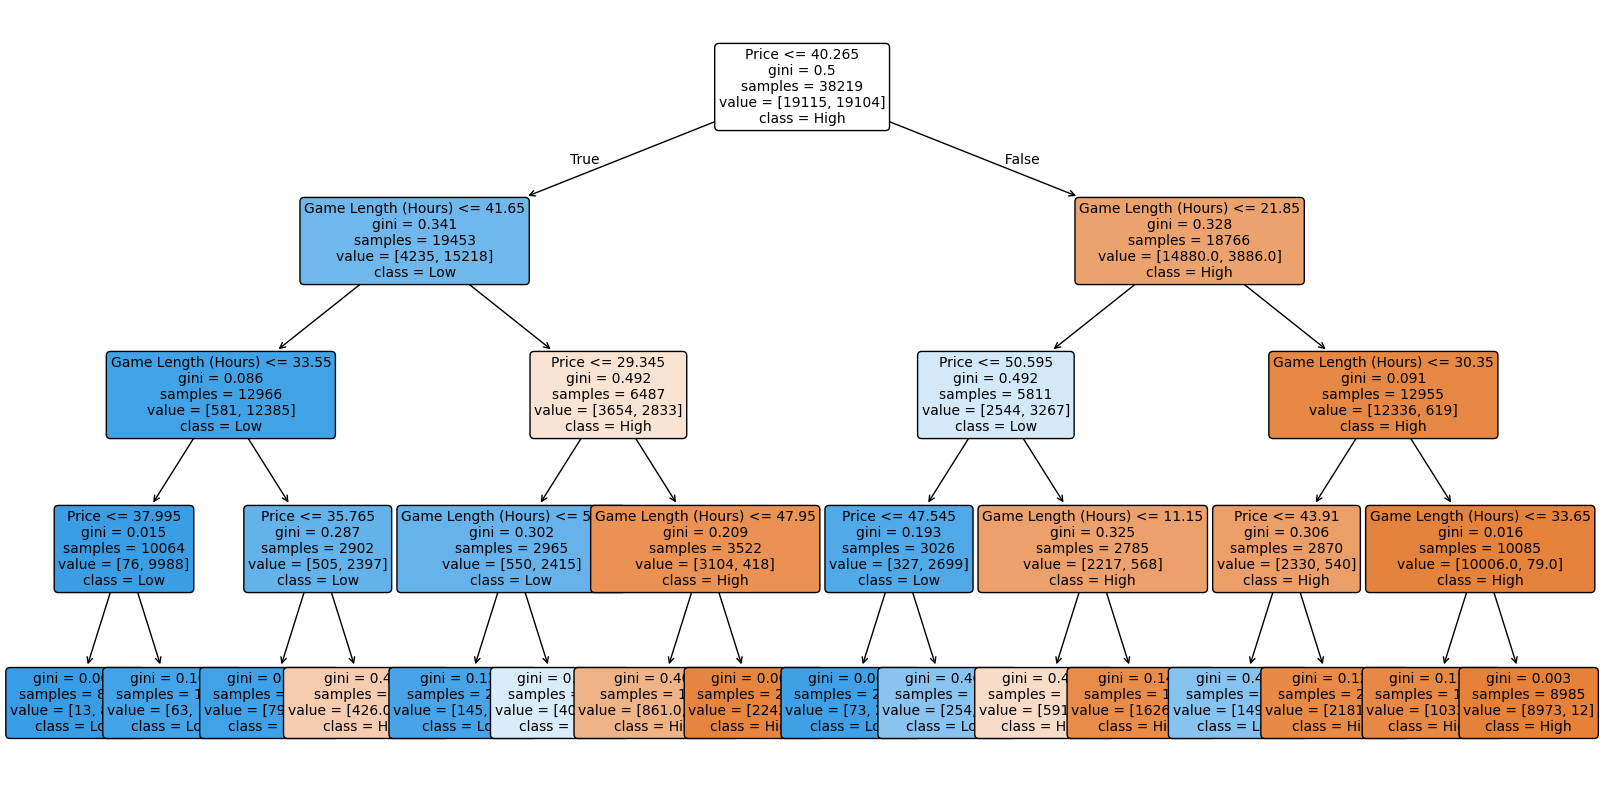

In [61]:
plt.figure(figsize=(20, 10))
plot_tree(tree)
plot_tree(
    tree,
    feature_names=features.columns,   # Show column names at splits
    class_names=tree.classes_,        # Show "High"/"Low" at leaves
    filled=True,                      # Color the nodes
    rounded=True,                     # Rounded boxes
    fontsize=10                       # Adjust for readability
)


plt.show()


In [63]:
# when we want to say to tree not to grow too mutch
tree = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20)

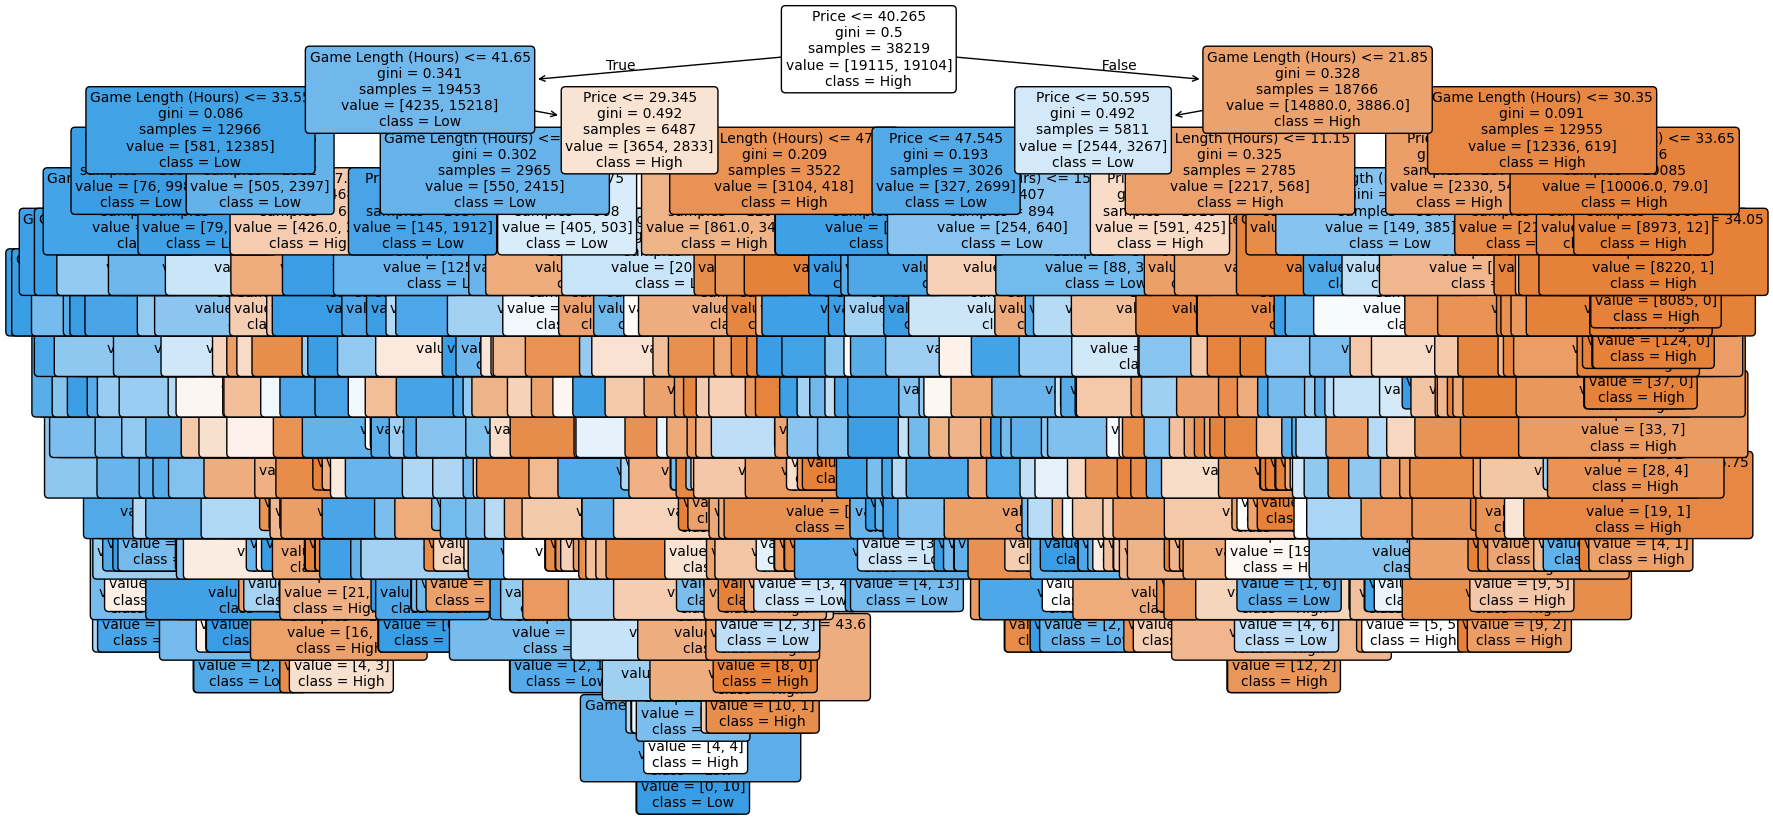

In [64]:
plt.figure(figsize=(20, 10))
plot_tree(tree)
plot_tree(
    tree,
    feature_names=features.columns,   # Show column names at splits
    class_names=tree.classes_,        # Show "High"/"Low" at leaves
    filled=True,                      # Color the nodes
    rounded=True,                     # Rounded boxes
    fontsize=10                       # Adjust for readability
)


plt.show()